In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      //documentはHTML文を取得(生成?)する
      //divタグを含んだHTML文を生成(Elemntクラス)
      const div = document.createElement('div');
      //buttonタグを含んだHTML文を生成(Elementクラス)
      //const capture = document.createElement('button');
      //文章（タグなし）を生成する
      //capture.textContent = 'Capture';

      //div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      //メディアデバイスの使用許可を求める。（ex.カメラ,オーディオ）
      //videoをTrueにしているため,ビデオデバイスの許可を得る
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      
      //bodyタグのドキュメント内にdivを挿入
      document.body.appendChild(div);
      div.appendChild(video);
      
      //メディアソース（表示する媒体）を提供するオブジェクトを設定または取得します
      video.srcObject = stream;
      //動画を再生
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //captureがクリックされると下の処理に移る.
      //下ではキャンバスに映像に映っているものを描画して、それを画像にて処理する
      //Promise（非同期）は成功した時にresolve関数を出力する(ここではonclickがされた時resolveが出力される)
      //awaitをつけることでPromiseに値が与えられるつまり、resolveされるまで以降の処理に移らないようにする
      //await new Promise((resolve) => capture.onclick = resolve);
      
      //＊文字入力で撮るように変更する
      await new Promise(function(resolve){
          document.body.addEventListener('keydown',
          event => {
              if (event.key === 'c') {
                  resolve("撮影")
                  }
                  });
      });

      const canvas = document.createElement('canvas');
      canvas.width = 224;
      canvas.height = 224;
      center_x=canvas.width/2
      center_y=canvas.height/2
      //canvas.getContext('2d'):HTML内に何か描画する際はcanvasを使用する.この設定によって2Dグラフィックを描画することができる
      //.drawImage(video, 0, 0):(image, sx, sy, sw, sh, dx, dy, dw, dh)。image以降は表示範囲を指定する.imageには <img>要素・ <canvas>要素・ <video>要素 のいずれかを指定する
      canvas.getContext('2d').drawImage(video,center_x-112,center_y-112,224,224);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


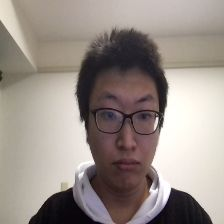

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
cc

In [ ]:
x.shape

(480, 640, 3)